In [1]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Unzip the content of the file
!unzip /content/drive/MyDrive/news.zip

Archive:  /content/drive/MyDrive/news.zip
  inflating: news.csv                


In [3]:
# import zipfile
# zip_ref = zipfile.ZipFile("/content/news (3).zip", 'r')
# zip_ref.extractall("/ruchit") 
# zip_ref.close()

In [4]:
import pandas as pd
#Read the data
df=pd.read_csv('/content/news.csv')
#Get shape and head
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
"""# Drop "case_id" column:-"""
print(df.columns)

df = df.drop(["Unnamed: 0"], axis = 1)


Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


In [6]:
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
"""# Drop rows having missing values:-"""

df.isnull().sum()


title    0
text     0
label    0
dtype: int64

In [8]:
# n#finding corelation between features using pearson method
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(16, 6))
# heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True
#                       )
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);


In [9]:
#Split last column(Target value) 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.head()


,title,text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...


In [10]:
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [11]:
#checking if there is any class imabalance

class_labels = df['label'].values.tolist()
class_labels_set = set(class_labels)

print(class_labels)
frequency_list =[]
for cls in class_labels_set:
  frequency_list.append(class_labels.count(cls))

print ('Freq',frequency_list)
print ('number',class_labels_set)
#SO THERE IS NO CLASS IMBALANCE IN DATASET.

['FAKE', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'FAKE', 'FAKE',

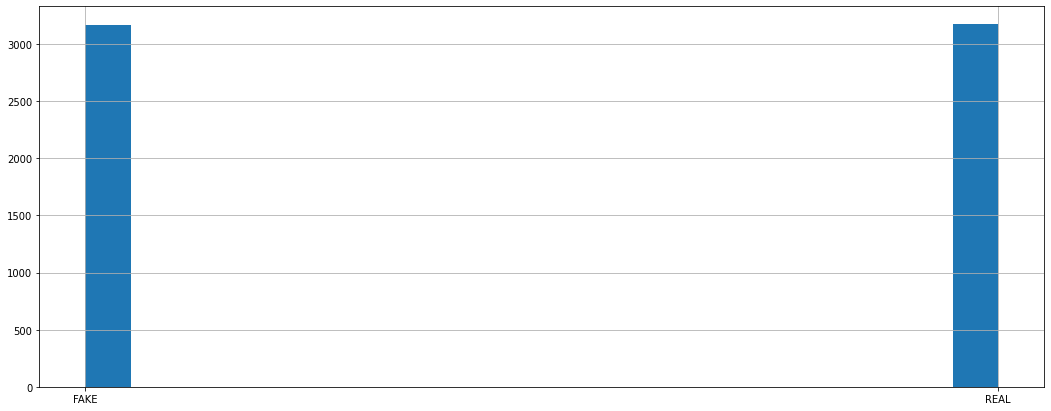

In [12]:
#THIS FIGURE ALSO SHOWS THAT THIS DATASET HAS NO CLASS IMBALANCE.
y.hist(figsize=(18,7), bins = 20)


In [13]:
# # #Split dataset into train and test

from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# X_train.head()


In [14]:
# Split the dataset
labels = df.label
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)
print(x_train.head)
print(y_train.head)
print(x_test.head)


<bound method NDFrame.head of 6237    The head of a leading survivalist group has ma...
3722    ‹ › Arnaldo Rodgers is a trained and educated ...
5774    Patty Sanchez, 51, used to eat 13,000 calories...
336     But Benjamin Netanyahu’s reelection was regard...
3622    John Kasich was killing it with these Iowa vot...
                              ...                        
5699                                                     
2550    It’s not that Americans won’t elect wealthy pr...
537     Anyone writing sentences like ‘nevertheless fu...
1220    More Catholics are in Congress than ever befor...
4271    It was hosted by CNN, and the presentation was...
Name: text, Length: 5068, dtype: object>
<bound method NDFrame.head of 6237    FAKE
3722    FAKE
5774    FAKE
336     REAL
3622    REAL
        ... 
5699    FAKE
2550    REAL
537     REAL
1220    REAL
4271    REAL
Name: label, Length: 5068, dtype: object>
<bound method NDFrame.head of 3534    A day after the candidates squared off

In [15]:
#Initialize a TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_xtrain=tfidf_vectorizer.fit_transform(x_train)
# tfidf_xtrain_Gaussian=tfidf_vectorizer.fit_transform(x_train.to_xarray())
# tfidf_ytrain=tfidf_vectorizer.fit_transform(y_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

print(tfidf_xtrain.shape)
print(tfidf_test.shape)
print(tfidf_test)

(5068, 61651)
(1267, 61651)
  (0, 60731)	0.05899712902382916
  (0, 60684)	0.033385466151529625
  (0, 60271)	0.04581143542258741
  (0, 60261)	0.07937859313949312
  (0, 59116)	0.10997273171965094
  (0, 59036)	0.08042180974421559
  (0, 58654)	0.07128159375531905
  (0, 58335)	0.0678398429566027
  (0, 57086)	0.12429244186413906
  (0, 55170)	0.20939665348422057
  (0, 54706)	0.035492943055135416
  (0, 54394)	0.10596727423829927
  (0, 54238)	0.06234899619642803
  (0, 53749)	0.04942070163765446
  (0, 53518)	0.117529167732626
  (0, 53144)	0.059982387365669215
  (0, 52555)	0.14065295472127948
  (0, 52483)	0.07360851972393109
  (0, 51960)	0.14065295472127948
  (0, 51955)	0.030414611451489323
  (0, 51663)	0.12057034351821985
  (0, 51527)	0.08134873077710283
  (0, 51159)	0.053278054236854326
  (0, 51005)	0.07360851972393109
  (0, 50068)	0.06481045119580665
  :	:
  (1266, 16835)	0.08080116269909657
  (1266, 16385)	0.0655727278454052
  (1266, 15999)	0.03279926109441314
  (1266, 14890)	0.05544599110567

In [16]:
#importing libraries for accuracy score and confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


 Decision Tree Accuracy:  0.7987371744277821
[[513 125]
 [130 499]]


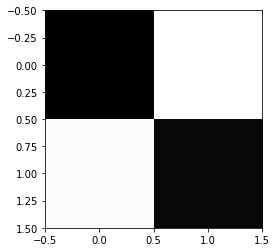

In [17]:
"""Decision Tree classifier"""

from sklearn.tree import DecisionTreeClassifier



classifier = DecisionTreeClassifier()
classifier.fit(tfidf_xtrain, y_train)

y_pred = classifier.predict(tfidf_test)

print("\n Decision Tree Accuracy: ", accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.imshow(cm,cmap='binary')

In [18]:
"""# Random Forest Classifier:-"""

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(tfidf_xtrain, y_train)

y_pred = classifier.predict(tfidf_test)

print("\nRandom Forest Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)


Random Forest Accuracy:  0.9029202841357538
[[572  66]
 [ 57 572]]


In [19]:
"""# Naive Bayes Classifier:-"""

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    stop_words='english',
    ngram_range=(1, 1),  #ngram_range=(1, 1) is the default
    dtype='double',
)
data = vectorizer.fit_transform(x_train.ravel())
# v = TfidfVectorizer(use_idf = True)
# X = v.fit_transform(X.astype('U')).toarray()

print(data.shape)
print(y_train.shape)

classifier = GaussianNB()
classifier.fit(data.toarray(), y_train)



(5068, 61651)
(5068,)


GaussianNB()

In [20]:
from sklearn.metrics import accuracy_score


X_new_counts = vectorizer.transform(x_test)
tfidf_transformer = TfidfTransformer()
X_new_tfidf = tfidf_transformer.fit_transform(X_new_counts)

y_pred = classifier.predict(X_new_tfidf.toarray())
print("\nNaive Bayes Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)


Naive Bayes Accuracy:  0.8184688239936859
[[471 167]
 [ 63 566]]


In [21]:
"""KNN classifier """

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15)

classifier.fit(data.toarray(),y_train)

y_pred = classifier.predict(X_new_tfidf.toarray())

print("\nKNN classifierBayes Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)


KNN classifierBayes Accuracy:  0.5035516969218626
[[638   0]
 [629   0]]


In [22]:
"""Logistic Regression classfier"""

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(tfidf_xtrain,y_train)
y_pred  = classifier.predict(tfidf_test)

print("\n Logistic Regression classifier accuracy:",accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)


 Logistic Regression classifier accuracy: 0.9171270718232044
[[600  38]
 [ 67 562]]


In [23]:
"""SVM"""

from sklearn import svm

classifier = svm.SVC(kernel='linear')
classifier.fit(tfidf_xtrain,y_train)
y_pred  = classifier.predict(tfidf_test)

print("\n Support Vector Classifier accuracy:",accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)


 Support Vector Classifier accuracy: 0.930544593528019
[[598  40]
 [ 48 581]]


In [24]:
"""Passive Aggressive Classifier"""

from sklearn.linear_model import PassiveAggressiveClassifier

classifier = PassiveAggressiveClassifier()
classifier.fit(tfidf_xtrain,y_train)
y_pred  = classifier.predict(tfidf_test)

print("\n Passive Aggressive Classifier accuracy:",accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)


 Passive Aggressive Classifier accuracy: 0.9218626677190213
[[584  54]
 [ 45 584]]
